# 【Task6(2天)】PyTorch理解更多神经网络优化方法
1. 了解不同优化器
2. 书写优化器代码
3. Momentum
4. 二维优化，随机梯度下降法进行优化实现
5. Ada自适应梯度调节法
6. RMSProp
7. Adam
8. PyTorch种优化器选择

In [8]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.utils.data as Data
import torch.nn.functional as F

## SGD
SGD就是最常见的优化器，计算梯度，将参数沿着负梯度的方向下降。
最简单的形式如下
dx = grad(x)
x += l * dx

In [ ]:
optim_SGD = torch.optim.SGD()

## Momentum
momentum 借鉴了物理上的概念。梯度下降我们可以认为是在山上找到山谷的过程。momentum 就像一块石头从山顶上滚下来，**带着惯性**
基本形式如下：

vx = rho * vx + dx
x += lr * vx

rho=(0.9-0.99)

In [ ]:
optim_Momentum = torch.optim.SGD(momentum=xx)

## 二阶方法
二阶方法是基于牛顿法的，但是需要求海森矩阵这是一个NxN的方针，当参数很多的时候，占用空间太大。所以一般的二阶优化都是类牛顿法的。


## ada
adagrad 是一个适应性学习率算法，简单的来说，就是一根据每个参数自己调整

## RMSprop
使用了一个梯度平方的滑动平均，其实跟ada是差不多的。
## adam 
是结合了RMSProp的和动量版本

下面是一些例子

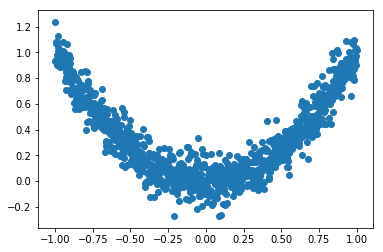

In [3]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [6]:
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
        
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x



Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


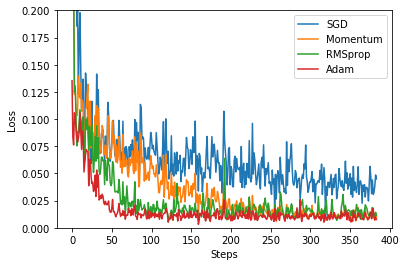

In [9]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

# different optimizers
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # record loss

# training
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (b_x, b_y) in enumerate(loader):          # for each training step
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.data.numpy())     # loss recoder

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

可以看到的是，adam表现的很好，loss降低的最快。